<a href="https://colab.research.google.com/github/VishalPallagani/Disaster-Prediction-from-Tweets/blob/master/EDA_and_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Competition: [Real or Not? NLP with Disaster Tweets
Predict which Tweets are about real disasters and which ones are not](https://www.kaggle.com/c/nlp-getting-started/overview)

Steps to use Kaggle dataset with Google Colab 

In [ ]:
!pip install -q kaggle

In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.8)


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vishalpallagani","key":"85fb2f761e18a692c58708f656298fc7"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.6MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=531c2b398d646a9961ffc996bdc6f02400b0e2da330d8afe271d9d07e17f3fbb
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


In [ ]:
! kaggle datasets list

ref                                                    title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shivan118/healthcare-analytics                         AV : Healthcare Analytics                           2MB  2020-09-13 17:40:05           2002         94  0.9411765        
datatattle/covid-19-nlp-text-classification            Coronavirus tweets NLP - Text Classification        4MB  2020-09-08 11:40:11           1305         75  1.0              
anmolkumar/health-insurance-cross-sell-prediction      Health Insurance Cross Sell Prediction 🏠 🏥          6MB  2020-09-11 18:39:31           2356        157  1.0              
Cornell-University/arxiv                               arXiv Dataset                                     888MB  202

In [ ]:
!kaggle competitions download -c nlp-getting-started -p /content

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 25.1MB/s]


In [ ]:
!unzip \*.zip

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Notebook covers:


*   Basic EDA
*   Data Cleaning
*   Baseline Model



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
nltk.download('stopwords')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [ ]:
train_rows = train.shape[0]
train_cols = train.shape[1]
print(f"There are {train_rows} rows and {train_cols} columns in the train dataset")

There are 7613 rows and 5 columns in the train dataset


In [ ]:
test_rows = test.shape[0]
test_cols = test.shape[1]
print(f"There are {test_rows} rows and {test_cols} columns in the train dataset")

There are 3263 rows and 4 columns in the train dataset


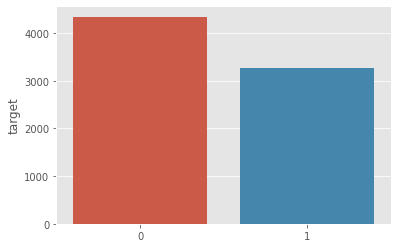

In [ ]:
x = train.target.value_counts()
sns.barplot(x.index,x)

EDA starts here/